In [1]:
# install.packages("iml")
# install.packages("randomForest")
# install.packages("partykit")
# install.packages("patchwork")
# install.packages("glmnet")

library(iml)
library(randomForest)
library(partykit)
library(patchwork)
library(glmnet)


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: Matrix

Loaded glmnet 4.1-8



In [2]:
carros <- read.csv("../data/carros.csv", sep = ";", encoding = "UTF-8")

head(carros)


,Consumo,Cilindros,Cilindradas,RelEixoTraseiro,Peso,Tempo,TipoMotor,Transmissao,Marchas,Carburadors,HP
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,21,6,160,39,262,1646,0,1,4,4,110
2,21,6,160,39,2875,1702,0,1,4,4,110
3,228,4,108,385,232,1861,1,1,4,1,93
4,214,6,258,308,3215,1944,1,0,3,1,110
5,187,8,360,315,344,1702,0,0,3,2,175
6,181,6,225,276,346,2022,1,0,3,1,105


In [3]:
modelo <- randomForest(HP ~ ., data = carros, ntree = 1000)

# carros[, -11] é o dataset sem a variável HP
previsor <- Predictor$new(modelo, carros[, -11], y = carros$HP)


#### Feature Importance

In [4]:
importancia <- FeatureImp$new(previsor, loss = "mse")

importancia$results


feature,importance.05,importance,importance.95,permutation.error
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Cilindros,3.868268,5.238461,8.274478,1385.9763
Carburadors,2.318931,2.954072,3.394430,781.5794
TipoMotor,2.486204,2.837033,3.127763,750.6137
Consumo,2.067154,2.347128,2.781403,620.9961
RelEixoTraseiro,1.508097,1.657673,1.946759,438.5821
Tempo,1.412613,1.480062,1.629440,391.5904
Cilindradas,1.347444,1.402432,1.447408,371.0514
Marchas,1.302307,1.328942,1.471589,351.6075
Peso,1.142588,1.230886,1.258969,325.6641


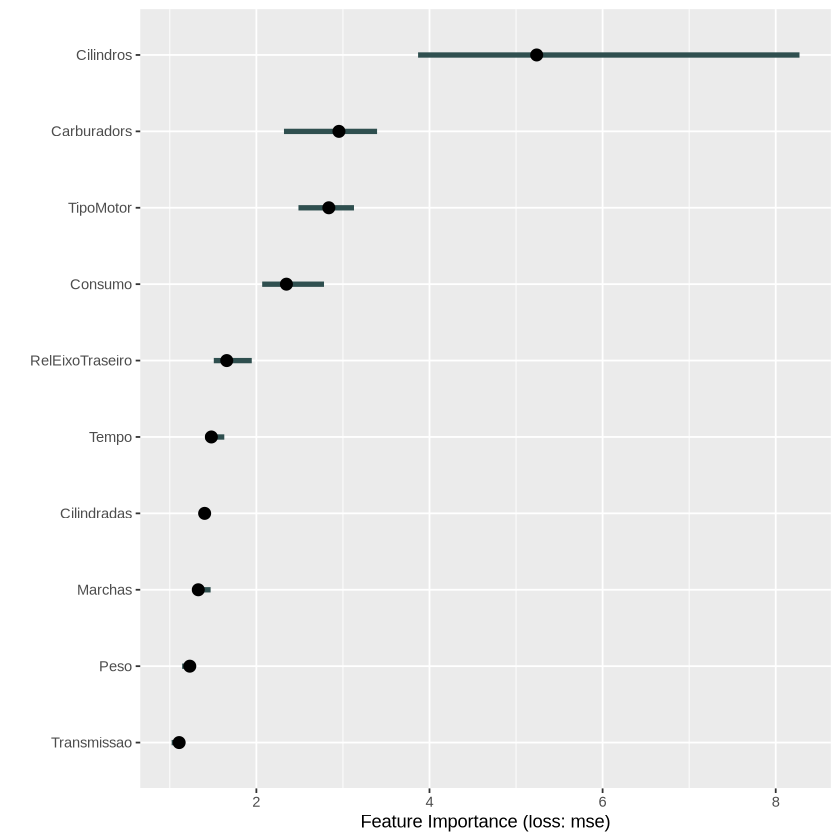

In [5]:
importancia$plot(type = "bar", order = TRUE)


#### Feature Effects

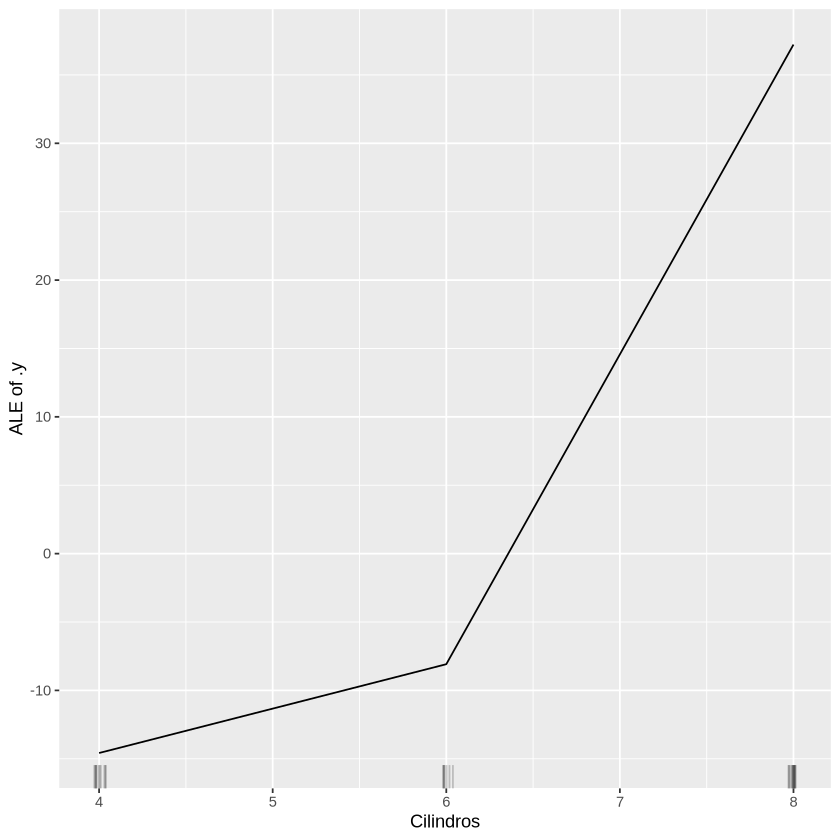

In [6]:
# Accumutated Local Effects
ALE <- FeatureEffect$new(previsor, feature = "Cilindros", method = "ale")

ALE$plot()


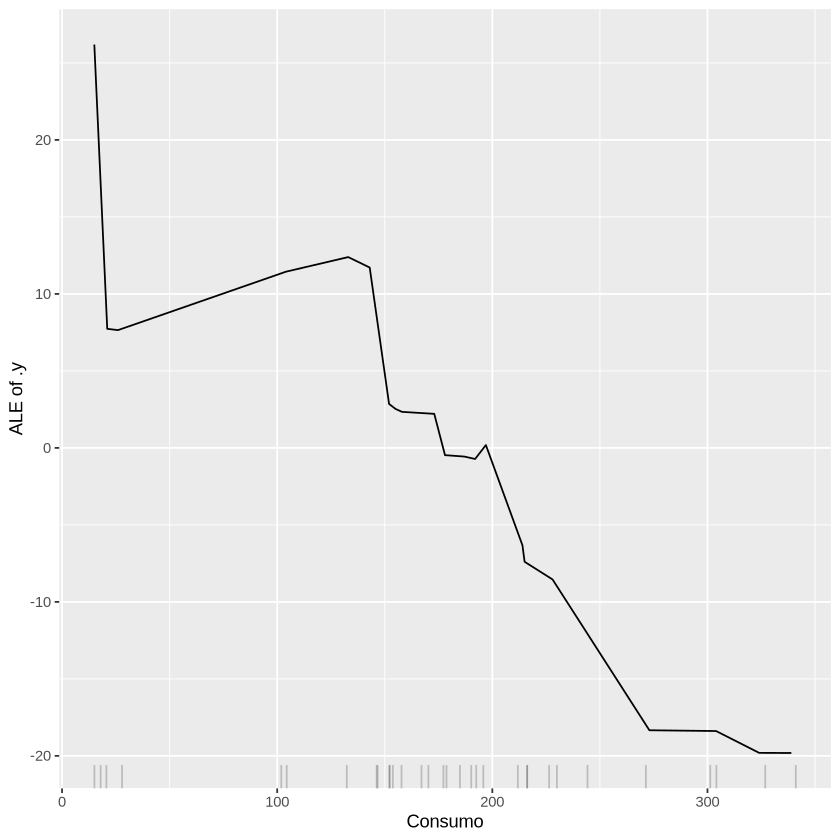

In [7]:
ALE$set.feature("Consumo")

ALE$plot()


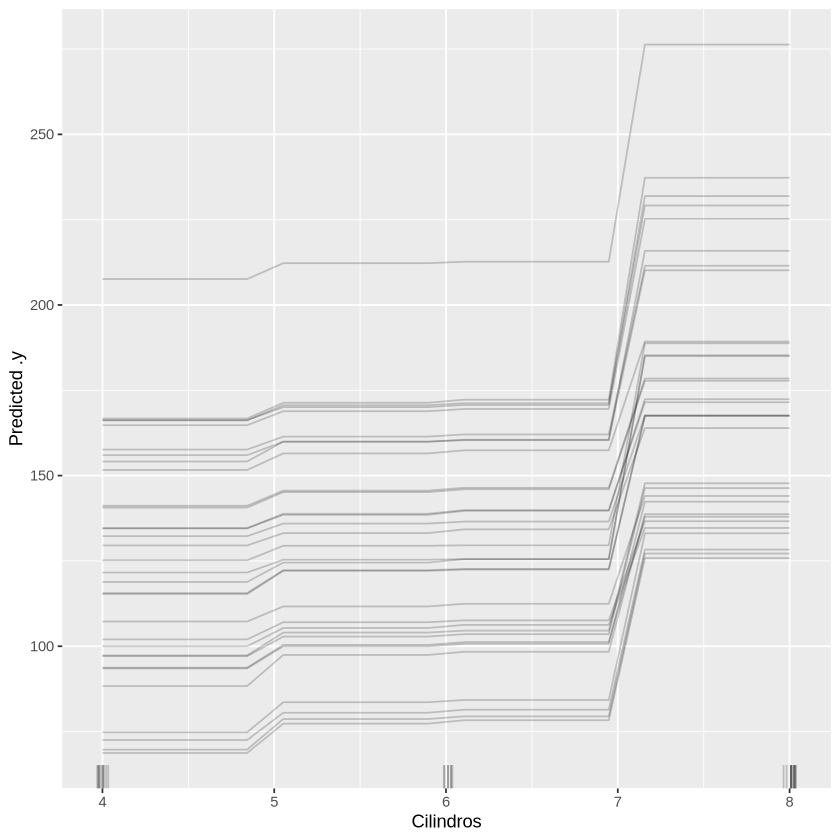

In [8]:
# Individual Conditional Expectation
ICE <- FeatureEffect$new(previsor, feature = "Cilindros", method = "ice")

ICE$plot()


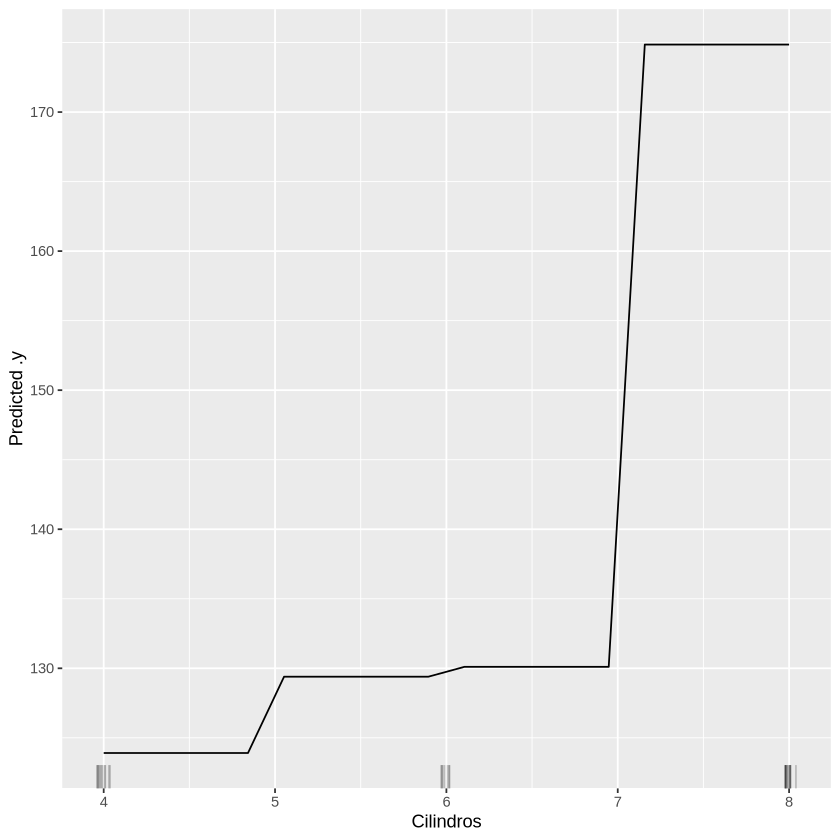

In [9]:
# Partial Dependence Plot
PDP <- FeatureEffect$new(previsor, feature = "Cilindros", method = "pdp")

PDP$plot()


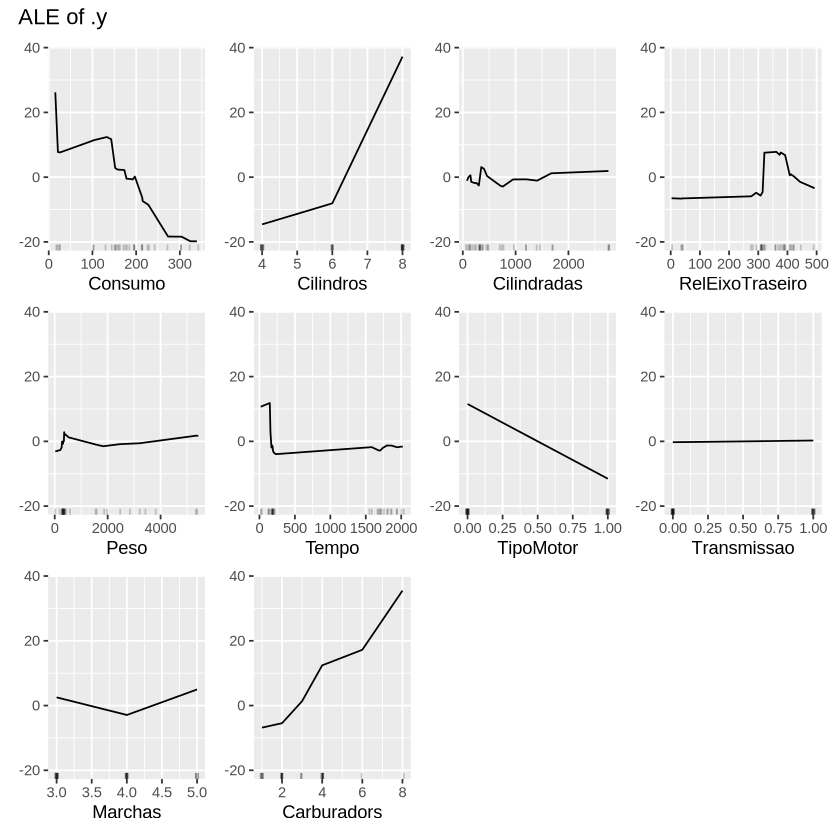

In [10]:
ALE <- FeatureEffects$new(previsor, method = "ale")

plot(ALE)


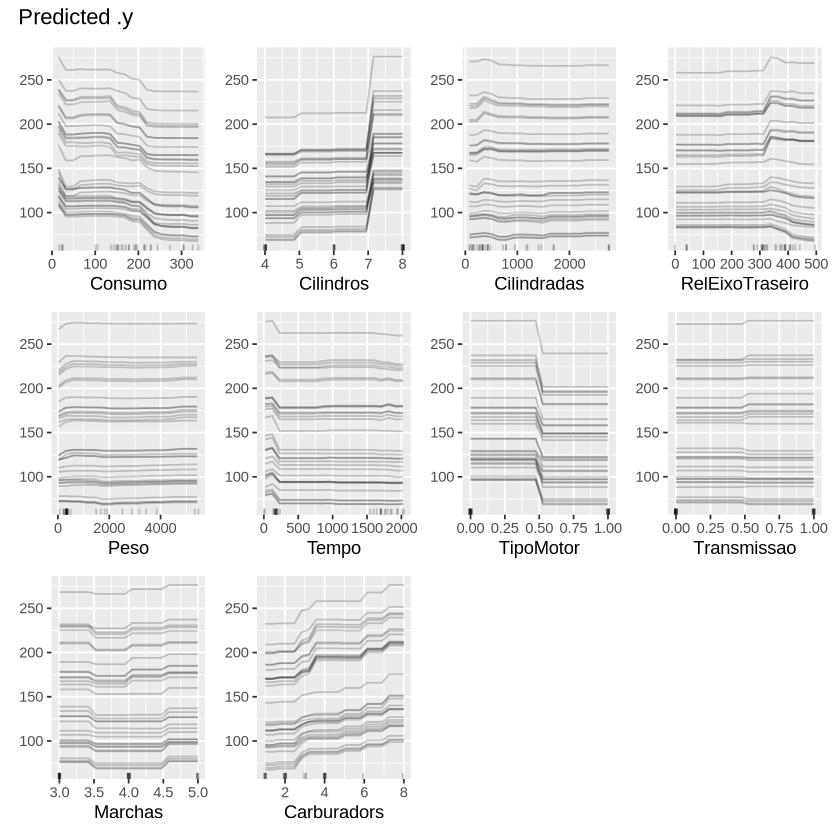

In [11]:
ICE <- FeatureEffects$new(previsor, method = "ice")

plot(ICE)


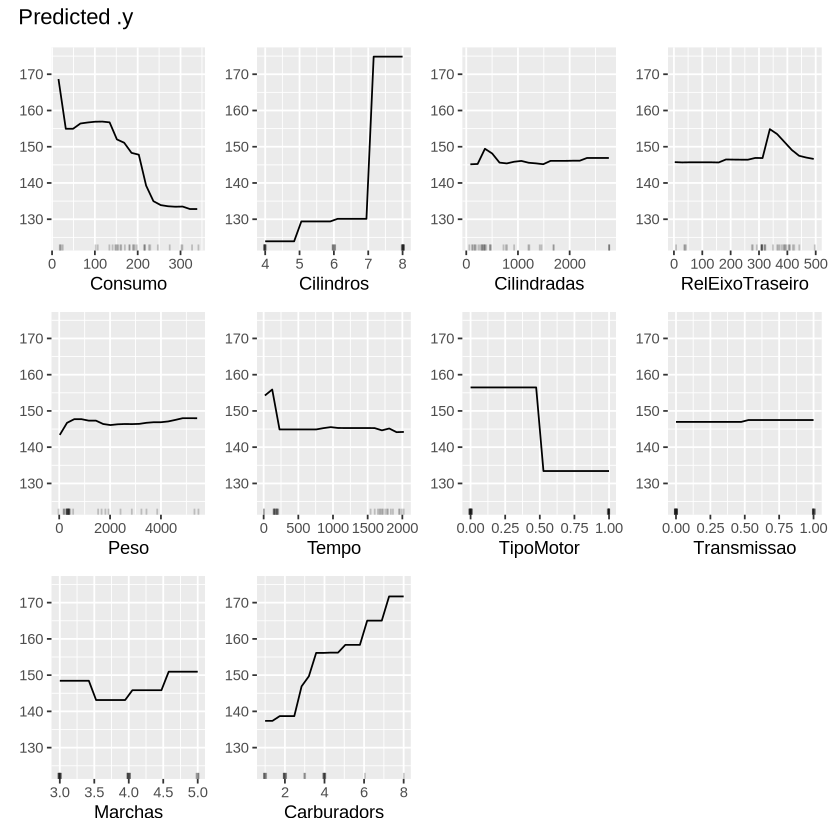

In [12]:
PDP <- FeatureEffects$new(previsor, method = "pdp")

plot(PDP)


#### Feature Interation

In [13]:
# Interaction between features
interacao <- Interaction$new(previsor)

interacao$results


.feature,.interaction
<chr>,<dbl>
Consumo,0.07691248
Cilindros,0.10071748
Cilindradas,0.03818571
RelEixoTraseiro,0.07796577
Peso,0.02928194
Tempo,0.03007223
TipoMotor,0.05710881
Transmissao,0.01832461
Marchas,0.02789381


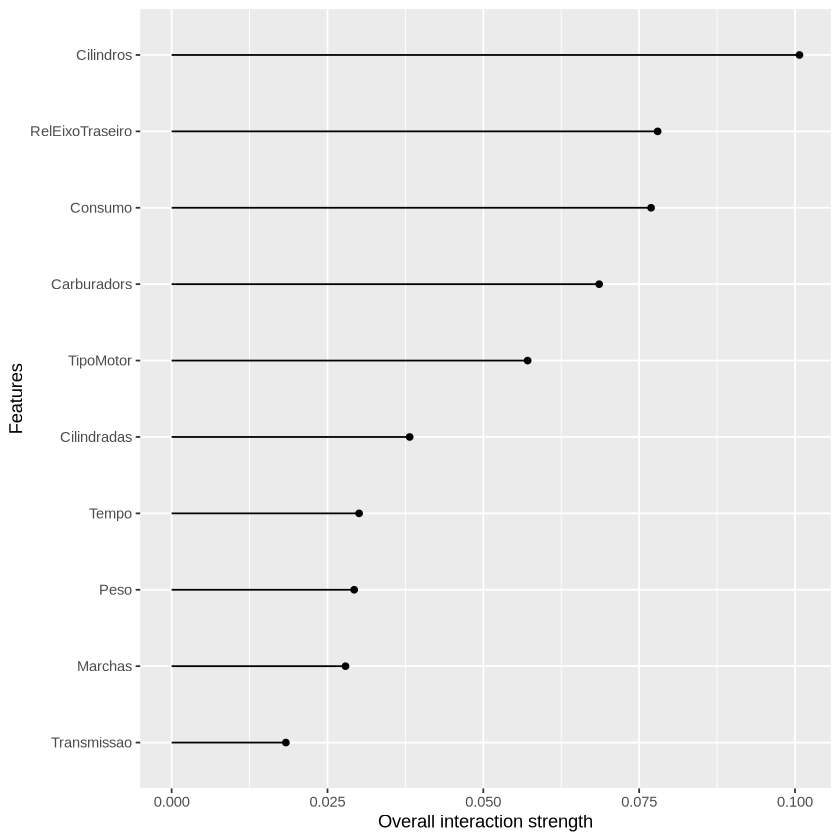

In [14]:
plot(interacao)


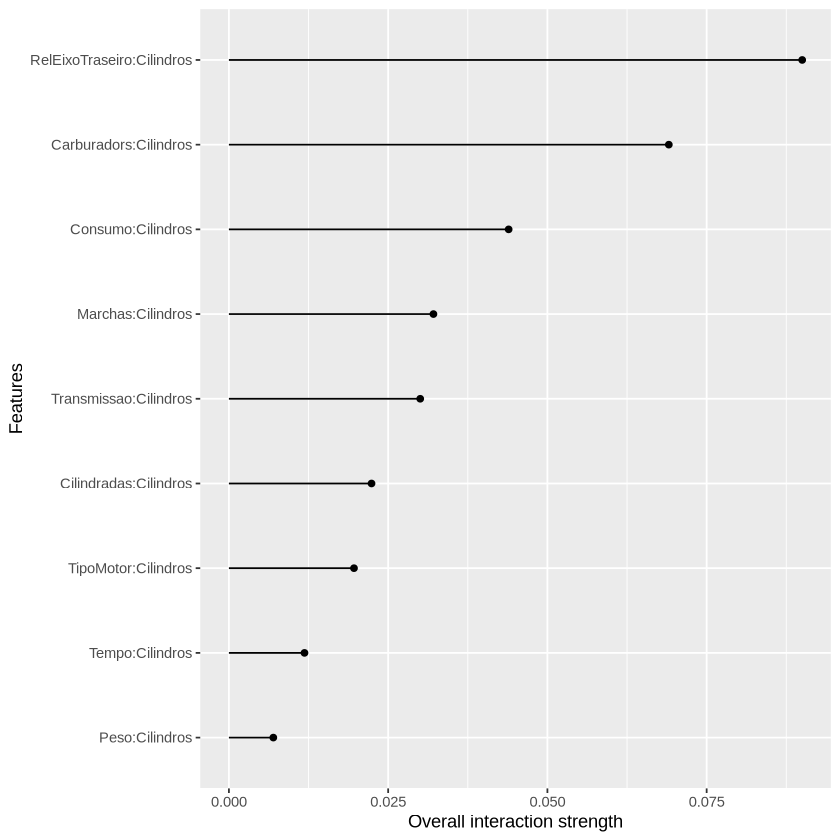

In [15]:
interacaoCilindros <- Interaction$new(previsor, feature = "Cilindros")

plot(interacaoCilindros)


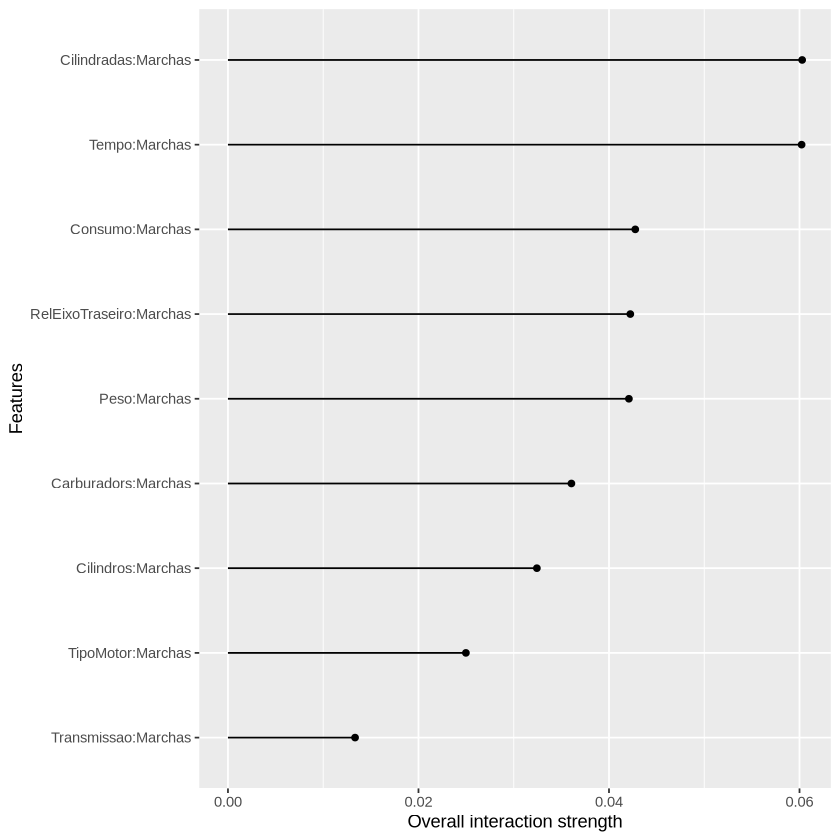

In [16]:
interecaoMarchas <- Interaction$new(previsor, feature = "Marchas")

plot(interecaoMarchas)


#### Local Technique

In [17]:
carros[10,]

,Consumo,Cilindros,Cilindradas,RelEixoTraseiro,Peso,Tempo,TipoMotor,Transmissao,Marchas,Carburadors,HP
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
10,192,6,1676,392,344,183,1,0,4,4,123


In [18]:
previsao <- predict(modelo, carros[10, ])

previsao


10 
122.2907

In [19]:
explicacao <- LocalModel$new(previsor, x.interest = carros[10, 1:10])

explicacao$results

Loading required package: gower



,beta,x.recoded,effect,x.original,feature,feature.value
,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
Cilindros,17.56498,6,105.38991,6,Cilindros,Cilindros=6
TipoMotor,-20.02504,1,-20.02504,1,TipoMotor,TipoMotor=1
Carburadors,8.95788,4,35.83152,4,Carburadors,Carburadors=4


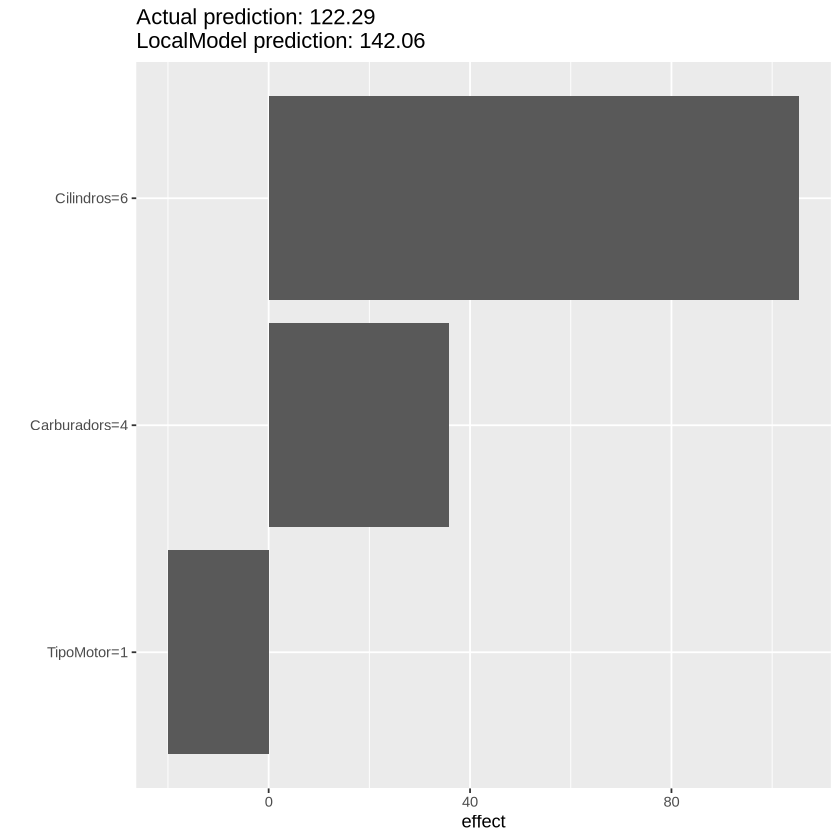

In [20]:
plot(explicacao)

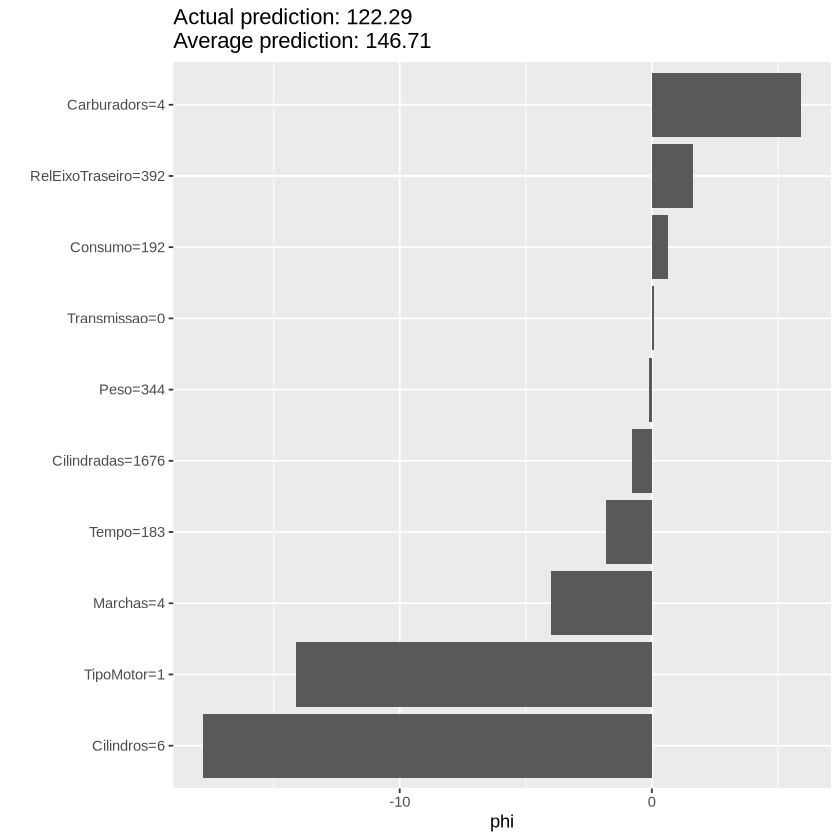

In [21]:
shapley <- Shapley$new(previsor, x.interest = carros[10, 1:10])

shapley$plot()

#### Surogate Model (Modelo Substituto)

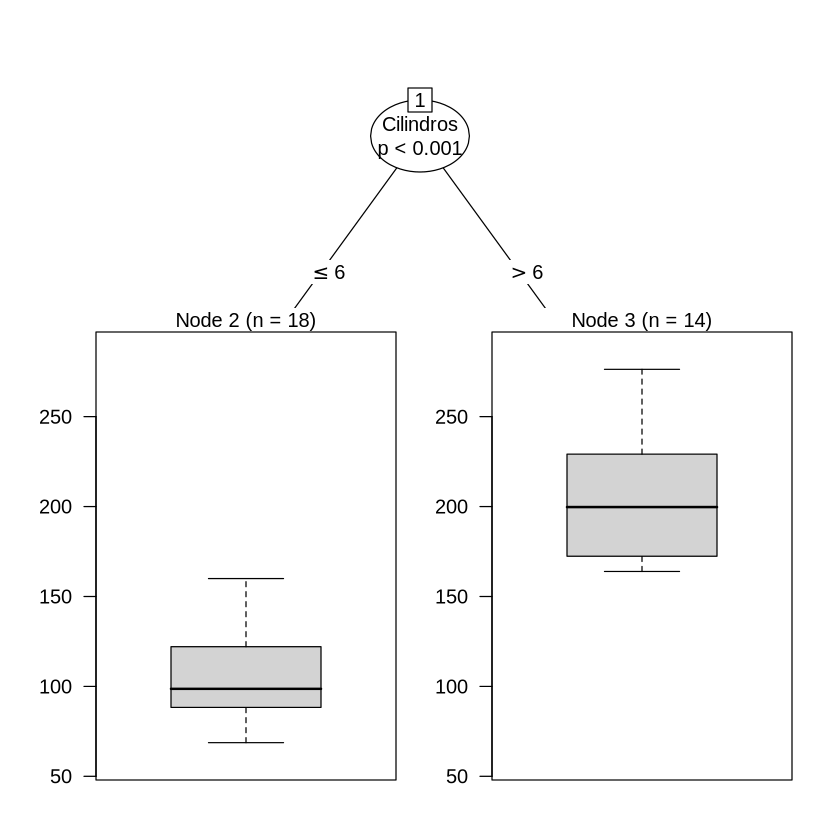

In [22]:
arvore = TreeSurrogate$new(previsor)

plot(arvore$tree)